<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/Grammar_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 4.1 MB/s 
     |████████████████████████████████| 6.6 MB 28.1 MB/s 
     |████████████████████████████████| 120 kB 43.9 MB/s 


In [4]:
pip install happytransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 1.7 MB/s 
     |████████████████████████████████| 1.3 MB 6.8 MB/s 
     |████████████████████████████████| 365 kB 44.4 MB/s 
     |████████████████████████████████| 115 kB 49.0 MB/s 
     |████████████████████████████████| 212 kB 49.5 MB/s 
     |████████████████████████████████| 127 kB 49.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


## Model

In [5]:
from happytransformer import HappyTextToText, TTSettings

In [6]:
happy_tt = HappyTextToText("T5", "vennify/t5-base-grammar-correction")

## Text to Text Settings

A class called TTSettings() is used to control which algorithm is used and its settings. It is passed to the “args” parameter for HappyTextToText.generate_text().

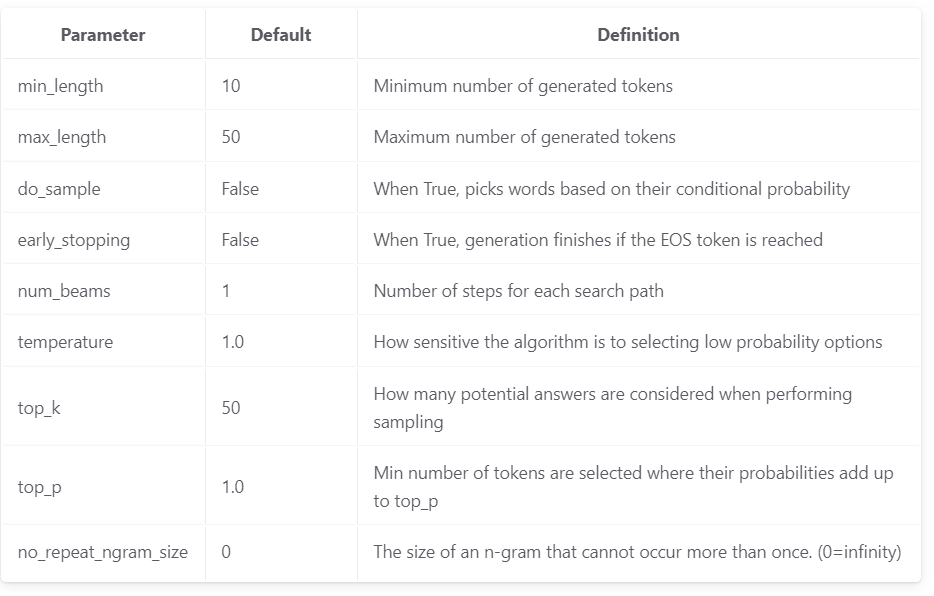

## First Input

In [7]:
beam_settings =  TTSettings(num_beams=5, min_length=1, max_length=100)
input_text_1 = "grammar: I I wants to go to market."

## Generate output

In [8]:
output_text_1 = happy_tt.generate_text(input_text_1, args=beam_settings)
print(output_text_1.text)

I want to go to market.


## Second Input

In [10]:
input_text_2 = "grammar: Ramesh and I goes to the market "
output_text_1 = happy_tt.generate_text(input_text_2, args=beam_settings)
print(output_text_1.text)

Ramesh and I go to the market.


In [12]:
happy_tt.save("/content/grammar")

In [16]:
model = HappyTextToText(model_type="T5", model_name="vennify/t5-base-grammar-correction", load_path="/content/grammar")

In [18]:
input_text3 = "grammar: I eats rice"
output = model.generate_text(input_text3,args=beam_settings)
print(output.text)

I eat rice.


## Sample Text

In [23]:
%%writefile sample.txt
"grammar: I eats rice"

Overwriting sample.txt


In [27]:
json.__version__

'2.0.9'

In [28]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [29]:
import shutil
shutil.move("/content/grammar","/content/drive/MyDrive/AFW")

'/content/drive/MyDrive/AFW/grammar'

## Inference Script

In [24]:
from happytransformer import HappyTextToText, TTSettings
import json
import re
def preprocess_function(input_data,content_type = None ):
    with open(input_data,"r") as f:
      data = f.read()
    print(data)
    return data

#
def predict_function(input_data, model): 
    beam_settings =  TTSettings(num_beams=5, min_length=1, max_length=100)
    return model.generate_text(input_data, args=beam_settings)
#
def model_load_function(model_file):
    # load model
    model = HappyTextToText(model_type="T5", 
                            model_name="vennify/t5-base-grammar-correction", 
                            load_path=model_file)
    return model
#
def postprocess_function(predictions,content_type = None ):
    output = predictions.text
    
    return json.dumps({"response": "Text Generated  : {}".format(output)})

if __name__ == "__main__":
    data_path = "/content/sample.txt"
    input_data = preprocess_function(data_path)
    model_file = "/content/grammar"
    model = model_load_function(model_file)
    predictions = predict_function(input_data, model)
    output = postprocess_function(predictions)
    print(output)

"grammar: I eats rice"

{"response": "Text Generated  : I eat rice."}


## Fine-Tune a Transformer Model for Grammar Correction

https://www.vennify.ai/fine-tune-grammar-correction/